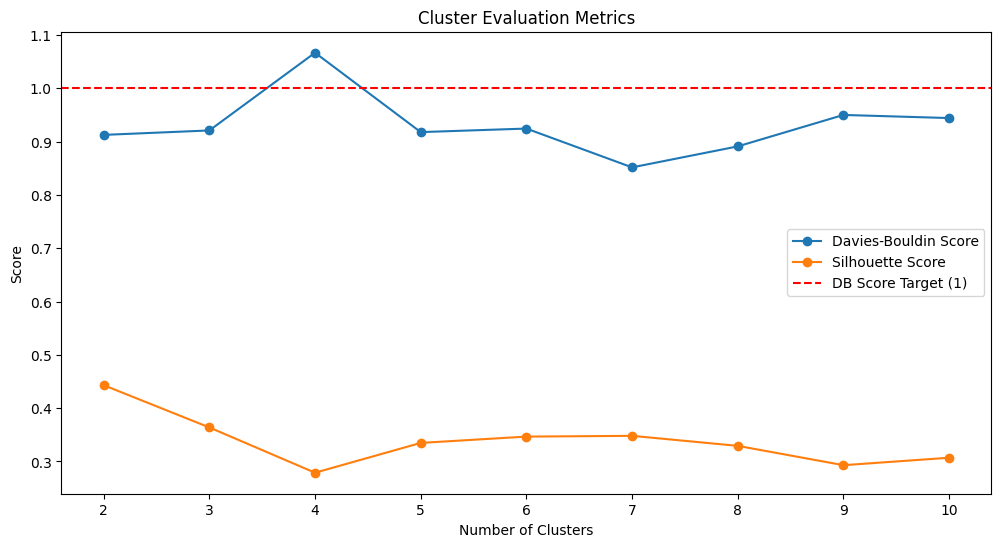

Final Davies-Bouldin Index: 0.8516
Final Silhouette Score: 0.3480


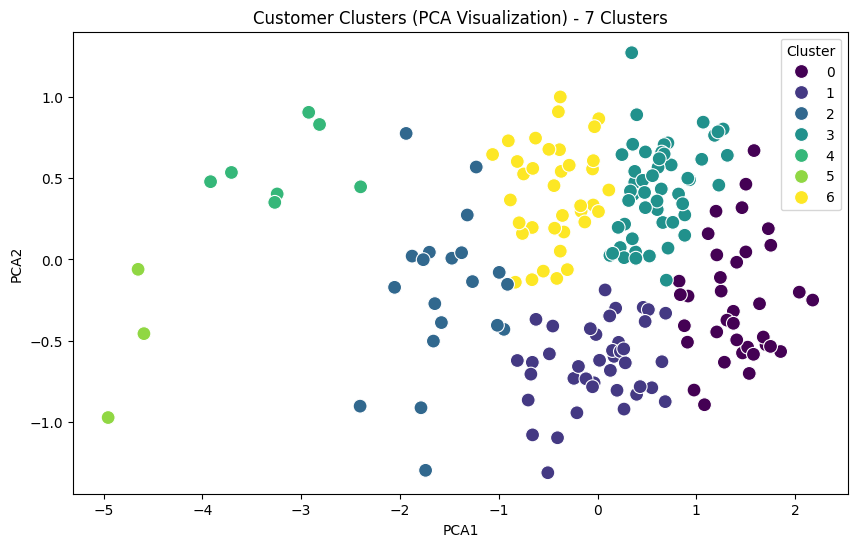

In [190]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=10)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

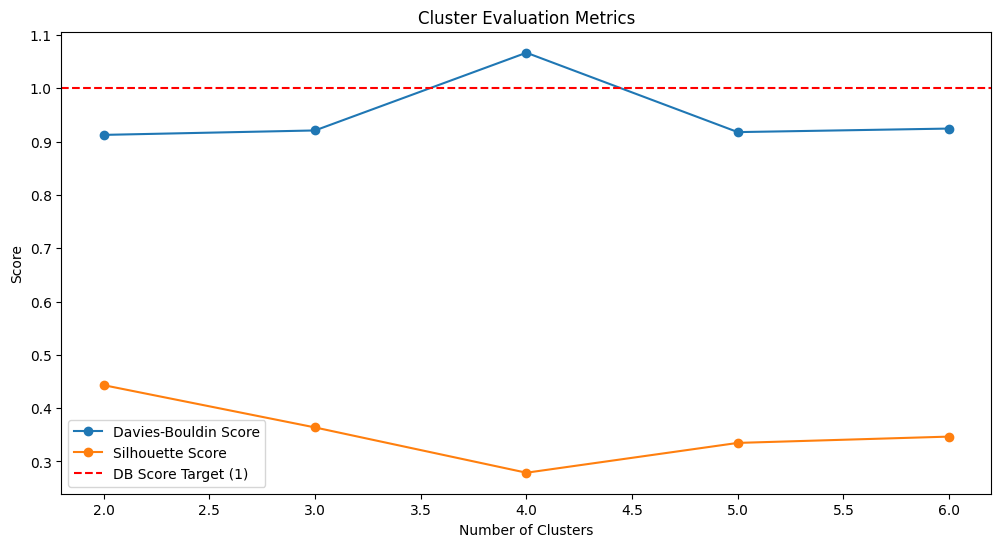

Final Davies-Bouldin Index: 0.9126
Final Silhouette Score: 0.4430


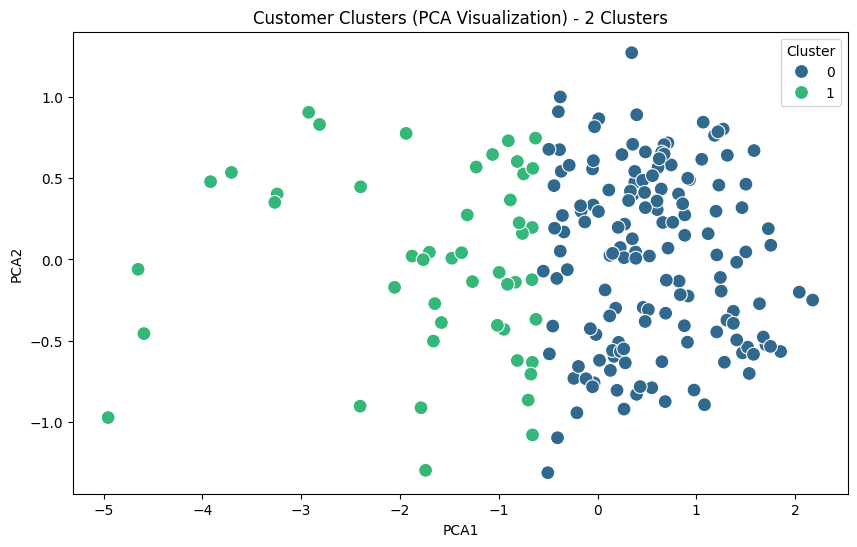

In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=6)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

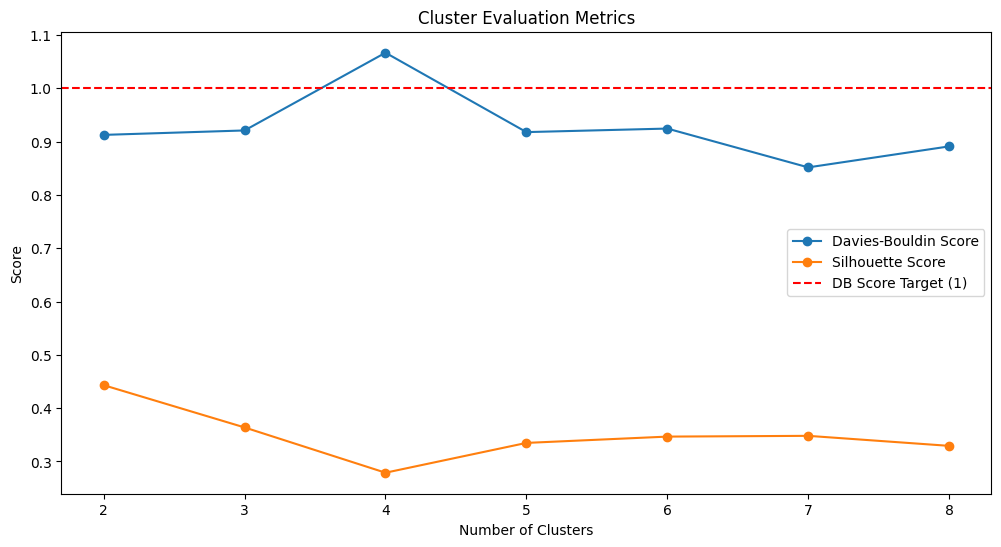

Final Davies-Bouldin Index: 0.8516
Final Silhouette Score: 0.3480


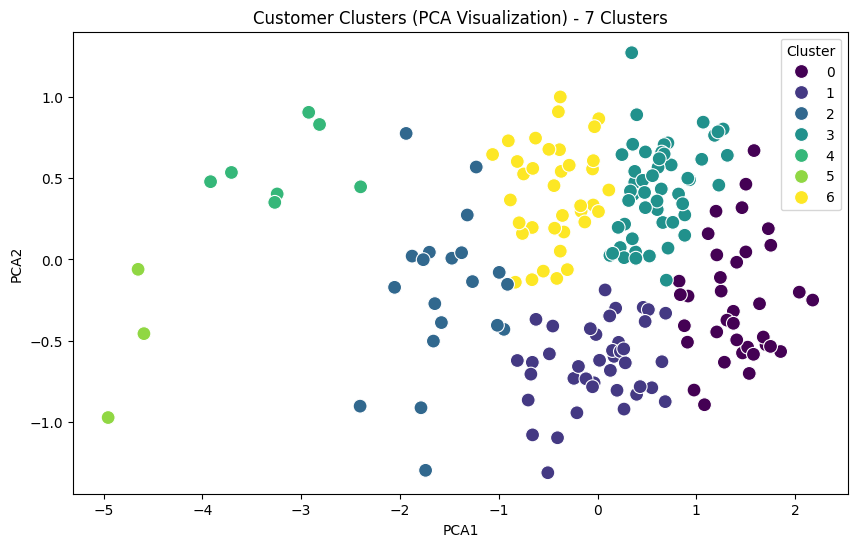

In [192]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=8)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

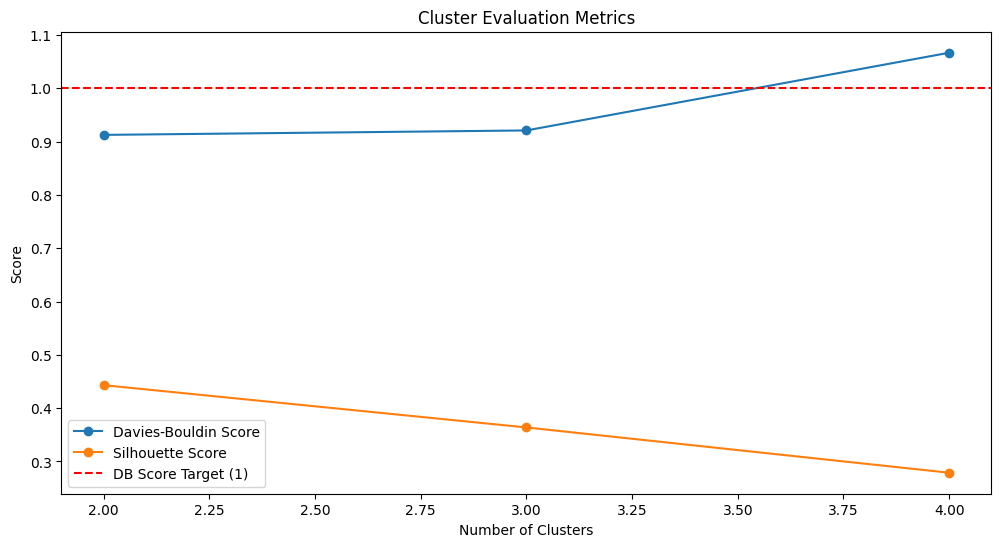

Final Davies-Bouldin Index: 0.9126
Final Silhouette Score: 0.4430


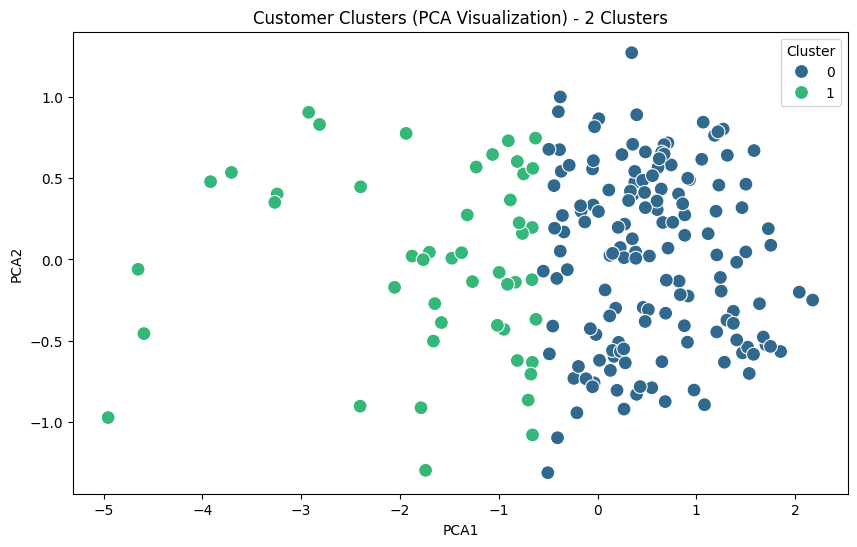

In [193]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=4)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

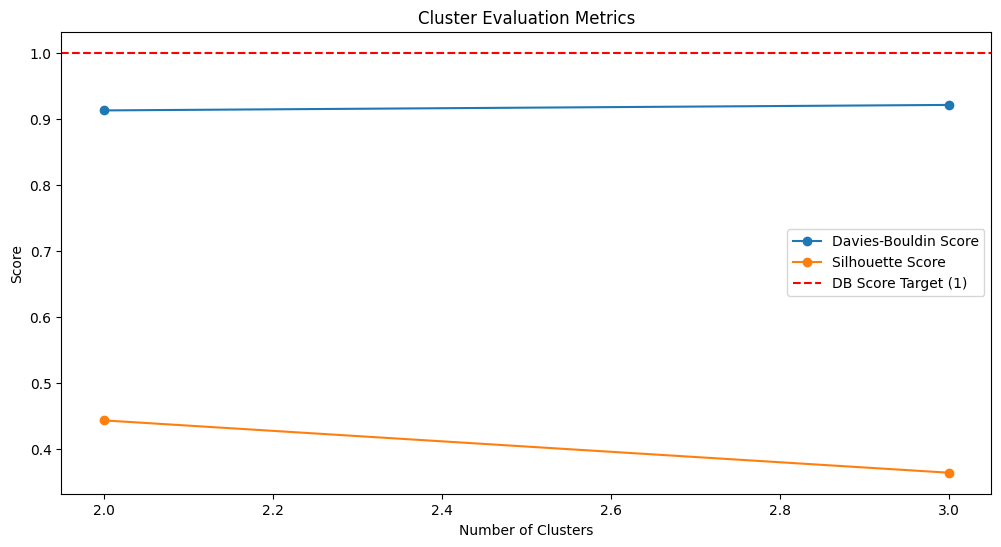

Final Davies-Bouldin Index: 0.9126
Final Silhouette Score: 0.4430


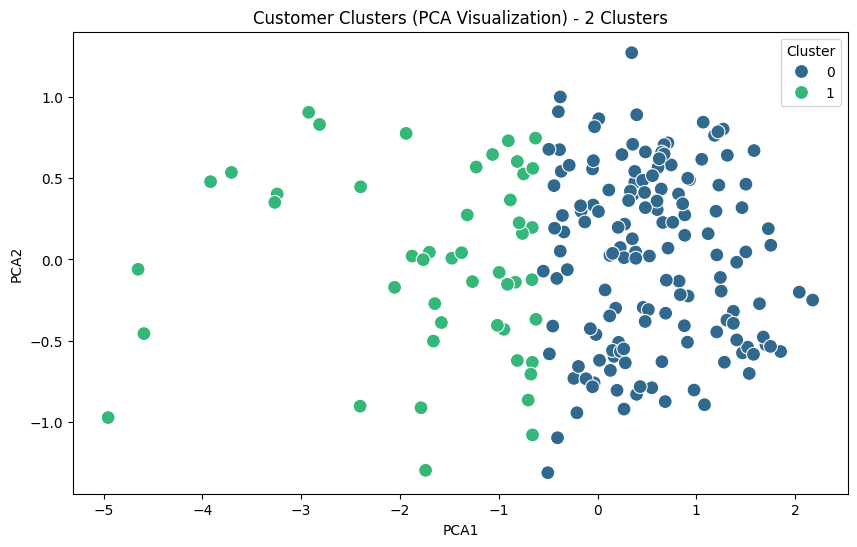

In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=3)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

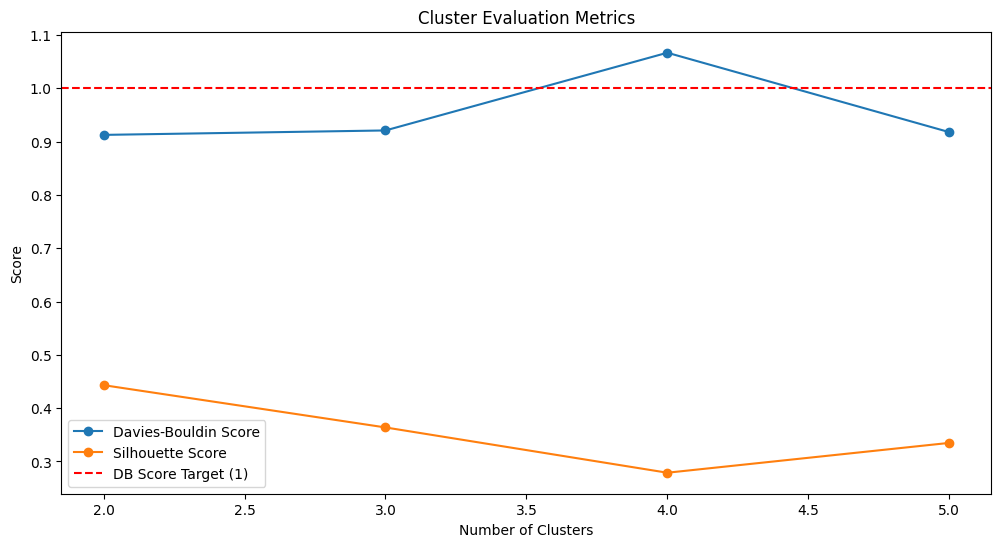

Final Davies-Bouldin Index: 0.9126
Final Silhouette Score: 0.4430


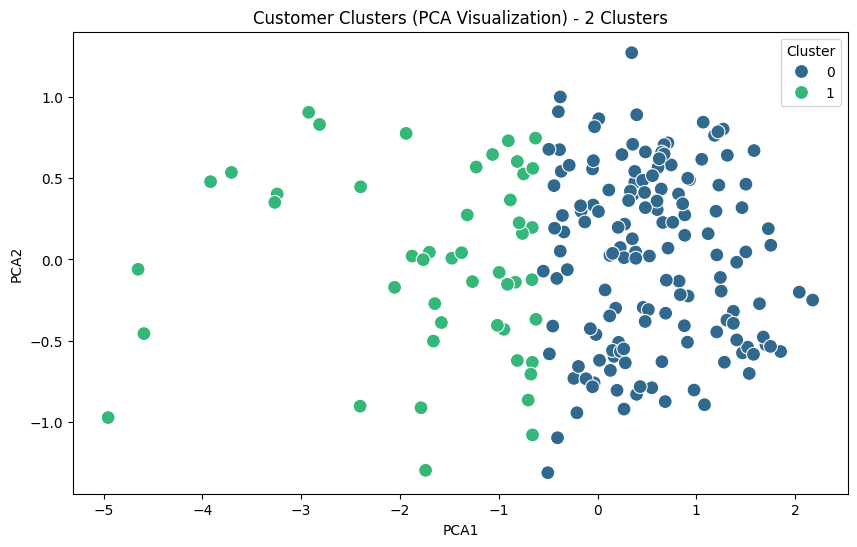

In [195]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=5)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

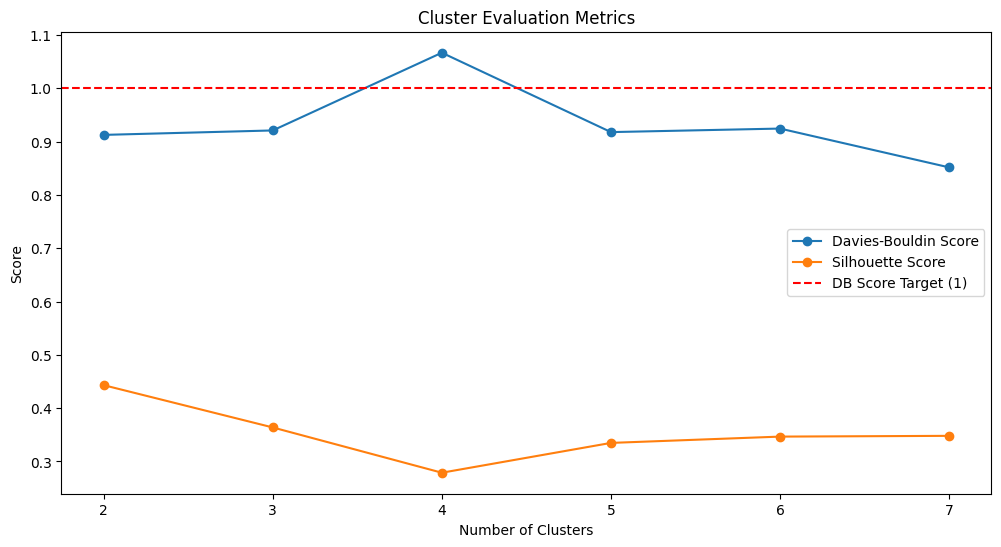

Final Davies-Bouldin Index: 0.8516
Final Silhouette Score: 0.3480


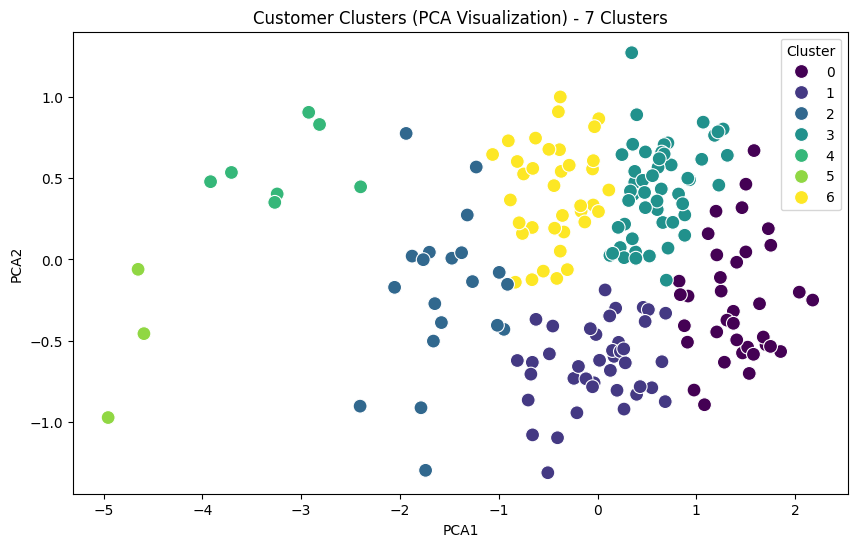

In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=7)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

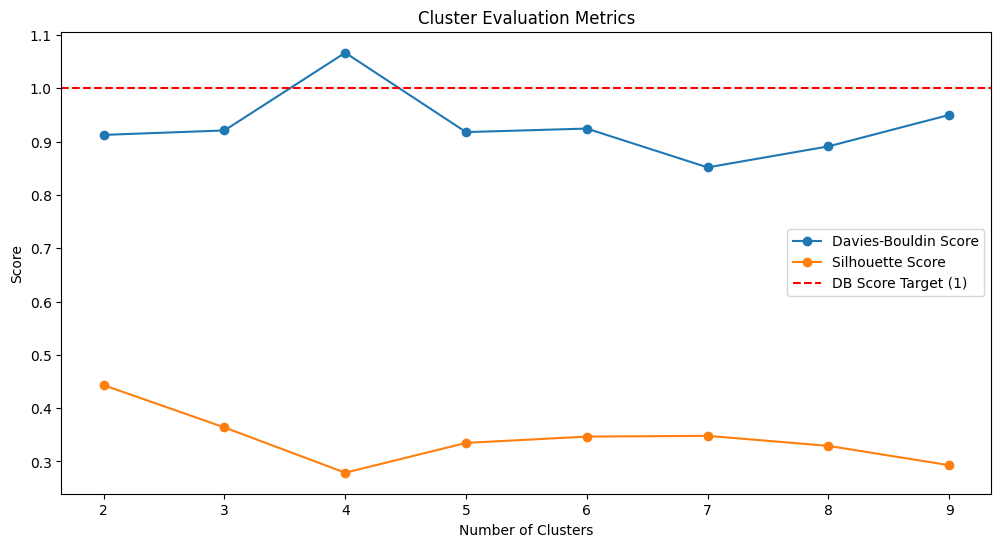

Final Davies-Bouldin Index: 0.8516
Final Silhouette Score: 0.3480


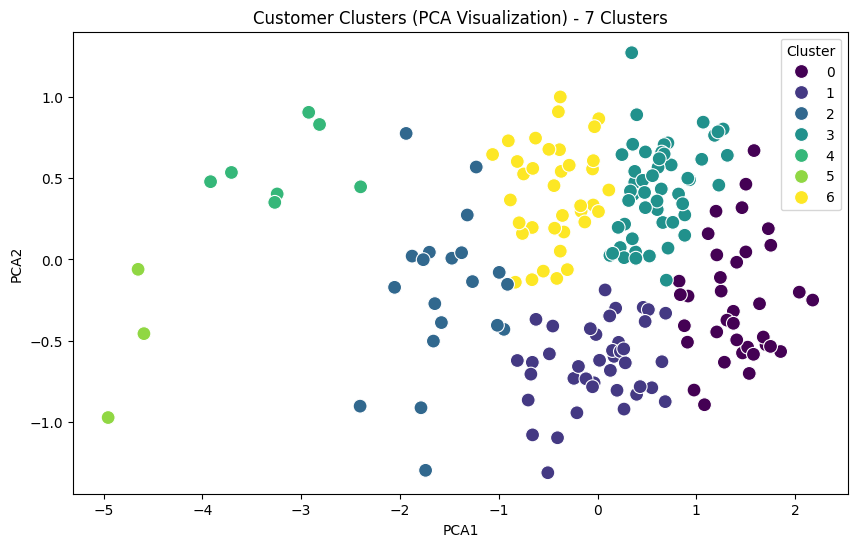

In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Clean_Customers.csv')
transactions = pd.read_csv('Clean_Transactions.csv')
products = pd.read_csv('Clean_Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Feature engineering
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    first_transaction=('TransactionDate', 'min'),
    last_transaction=('TransactionDate', 'max')
).reset_index()

# Calculate recency (days since last transaction)
customer_summary['last_transaction'] = pd.to_datetime(customer_summary['last_transaction'])
customer_summary['recency_days'] = (pd.to_datetime("today") - customer_summary['last_transaction']).dt.days

# Select clustering features
features = customer_summary[['total_spent', 'transaction_count', 'recency_days']]

# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)
features = features[outliers == 1]
customer_summary = customer_summary[outliers == 1]

# Log transform to reduce skewness
features = features.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Robust Scaling (less sensitive to outliers)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    db_scores = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42)
        clusters = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, clusters))
        sil_scores.append(silhouette_score(data, clusters))
    return db_scores, sil_scores

db_scores, sil_scores = evaluate_clusters(scaled_features, max_clusters=9)

# Plot DB and Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(db_scores) + 2), db_scores, label='Davies-Bouldin Score', marker='o')
plt.plot(range(2, len(sil_scores) + 2), sil_scores, label='Silhouette Score', marker='o')
plt.axhline(1, color='red', linestyle='--', label='DB Score Target (1)')
plt.title('Cluster Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Choose optimal clusters based on DB < 1 and high Silhouette Score
optimal_clusters = np.argmin(db_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_summary['cluster'] = clusters

# Evaluate final clustering
final_db_index = davies_bouldin_score(scaled_features, clusters)
final_sil_score = silhouette_score(scaled_features, clusters)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')
print(f'Final Silhouette Score: {final_sil_score:.4f}')

# Dimensionality Reduction for visualization
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_features)
customer_summary['pca1'] = pca_features[:, 0]
customer_summary['pca2'] = pca_features[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster', data=customer_summary, palette='viridis', s=100
)
plt.title(f'Customer Clusters (PCA Visualization) - {optimal_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()